In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('C:\Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=range(20),
                      skipfooter=2)
print ('Data read into a pandas dataframe')

Data read into a pandas dataframe


In [3]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


In [43]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

In [5]:
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents.head()

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142


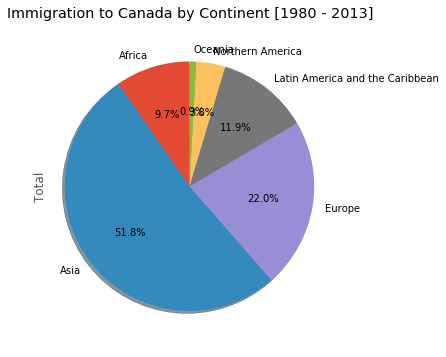

In [6]:
df_continents['Total'].plot(kind='pie',
                           figsize=(5, 6),
                           autopct='%1.1f%%',  #add in percentages
                           startangle=90,  #start angle 90° (Africa)
                           shadow=True,   #add shadow
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') #sets the pie chart to look like a circle

plt.show()

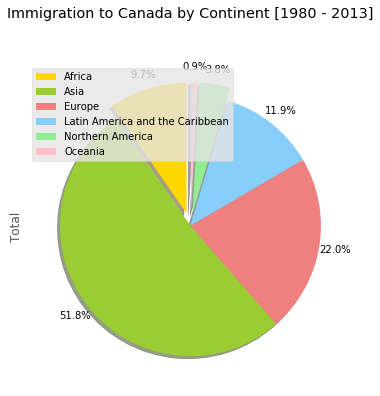

In [7]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1]

df_continents['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',  
                           startangle=90,  
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           colors=colors_list,
                           explode=explode_list
                           )

plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12)
plt.axis=('equal')

plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

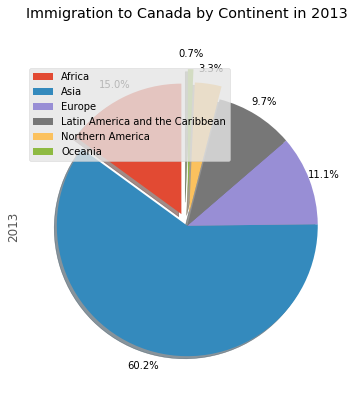

In [8]:
explode_list = [0.1, 0, 0, 0, 0.1, 0.2]

df_continents['2013'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',  
                           startangle=90,  
                           shadow=True,
                           labels=None,
                           pctdistance=1.12,
                           explode=explode_list
                           )

plt.title('Immigration to Canada by Continent in 2013', y=1.12)
plt.axis=('equal')

plt.legend(labels=df_continents.index, loc='upper left')
plt.show()

In [9]:
#Box Plot

df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


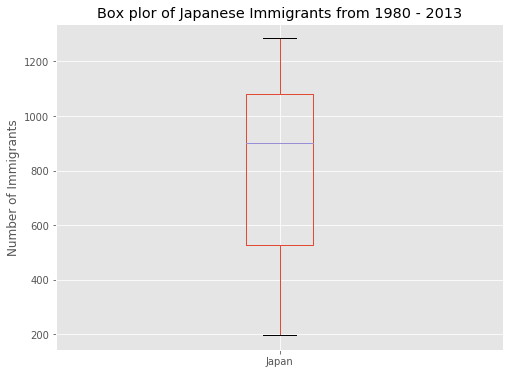

In [10]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plor of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

In [11]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


In [12]:
df_CI = df_can.loc[['China', 'India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


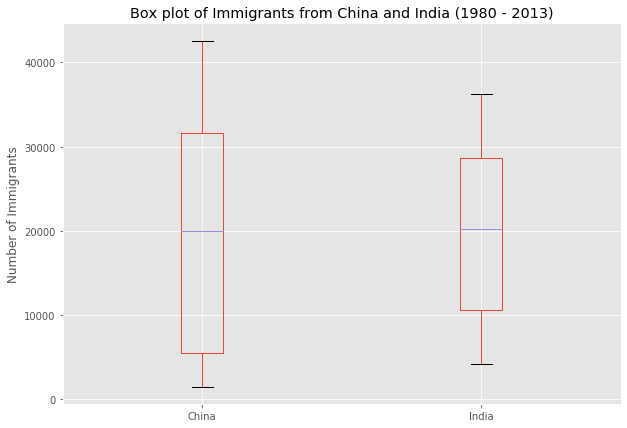

In [13]:
df_CI.plot(kind='box', figsize=(10, 7))

plt.title('Box plot of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

In [14]:
df_CI.describe()

Country,China,India
count,34.000000,34.000000
mean,19410.647059,20350.117647
std,13568.230790,10007.342579
min,1527.000000,4211.000000
25%,5512.750000,10637.750000
50%,19945.000000,20235.000000
75%,31568.500000,28699.500000
max,42584.000000,36210.000000


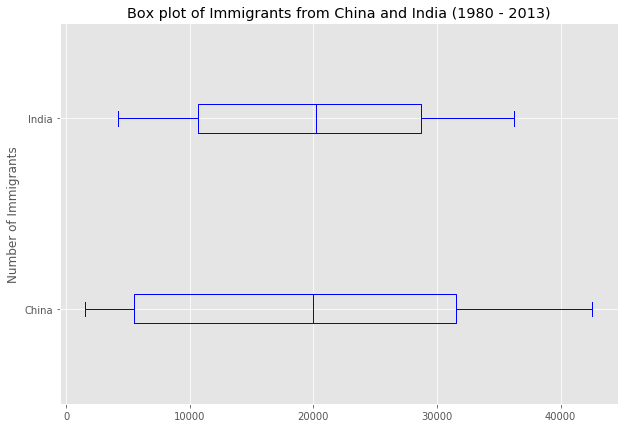

In [15]:
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plot of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

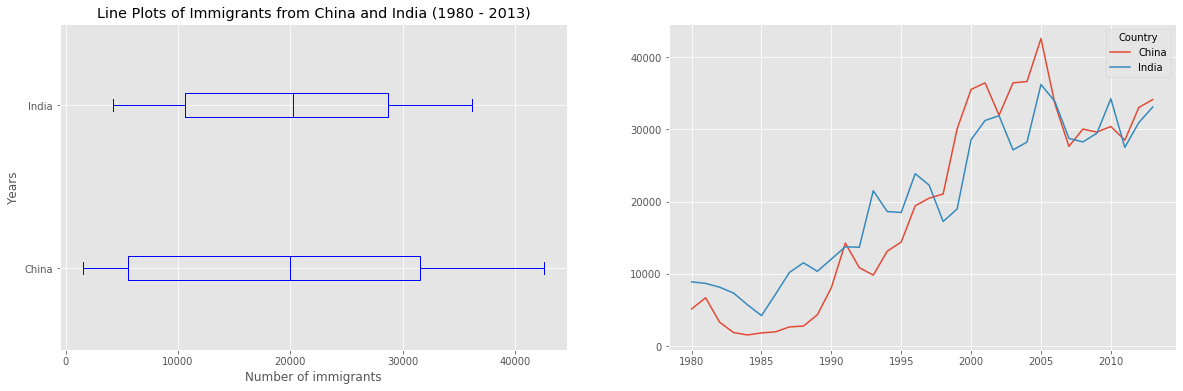

In [16]:
#Subplots

fig= plt.figure()

ax0 = fig.add_subplot(1, 2, 1) #add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) #add subplot 2 (1row, 2 columns, second plot)

#Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0)
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of immigrants')
ax0.set_ylabel('Countries')

#Subplot 2: Line plot

df_CI.plot(kind='line', figsize=(20, 6), ax=ax1)
ax0.set_title('Line Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of immigrants')
ax0.set_ylabel('Years')

plt.show()

In [17]:
 #Top 15 countries grouped by the decades 1980s, 1990s and 2000s
    
df_top15 = df_can.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [20]:
#Creating nem dataframe

years_80s = list(map(str, range(1908, 1990)))
years_90s = list(map(str, range(1990, 2000)))
years_00s = list(map(str, range(2000, 2010)))

years_80s
years_90s
years_00s

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009']

In [21]:
#slice the original dataframe df_can to create a series for each decade

df_80s = df_top15.loc[:],sum(map(int, years_80s))
df_90s = df_top15.loc[:],sum(map(int, years_90s))
df_00s = df_top15.loc[:],sum(map(int, years_00s))

new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s})

new_df.head()


,1980s,1990s,2000s
0,...,...,...
1,159777,19945,20045


In [37]:
new_df = map(int, new_df)

new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.ylabel('Number of Immigrants')
plt.show()

AttributeError: 'map' object has no attribute 'index'

In [24]:
#Scatter Plots

#sum method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

df_tot.index = map(int, df_tot.index)

#reset the index to put it back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

df_tot.columns = ['year', 'total']

df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


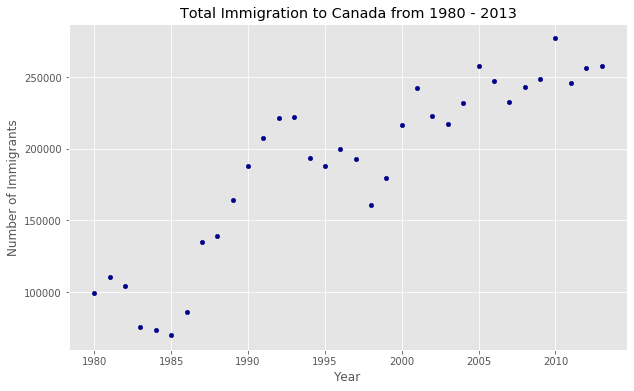

In [26]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

In [27]:
x = df_tot['year']
y = df_tot['total']
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

TypeError: annotate() missing 1 required positional argument: 'xy'

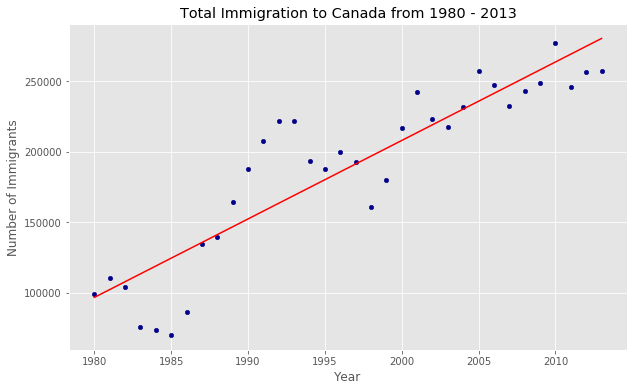

In [33]:
#Plot the regression line on the scatter plot

df_tot.plot(kind='scatter', x='year',y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

#plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') #recall that x is the years
plt.annotate('y={0:.0f} x + {1:.0f}' .format(fit[0], fit[1]), x=2000, y=150000)

plt.show()

'No. Immiggrants = {0:.0f} * Year + {1:.0f}. format(fit[0], fit[1])'

In [35]:
#Bubble plot
#Immigration from Brazil and Argentina

df_can_t = df_can[years].transpose()
df_can_t.index = map(int, df_can_t.index)
df_can_t.index.name='Year'
df_can_t.reset_index(inplace=True)

df_can_t.head()

Country,Year,Afghanistan,Albania,Algeria,American Samoa,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,...,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Western Sahara,Yemen,Zambia,Zimbabwe
0,1980,16,1,80,0,0,1,0,368,0,...,9378,128,0,0,103,1191,0,1,11,72
1,1981,39,0,67,1,0,3,0,426,0,...,10030,132,0,0,117,1829,0,2,17,114
2,1982,39,0,71,0,0,6,0,626,0,...,9074,146,0,0,174,2162,0,1,11,102
3,1983,47,0,69,0,0,6,0,241,0,...,7100,105,0,0,124,3404,0,6,7,44
4,1984,71,0,63,0,0,4,42,237,0,...,6661,90,0,0,142,7583,0,0,16,32


In [40]:
#normalize BR and Argentina data

norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t)['Brazil'].max() - df_can_t['Brazil'].min()

norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t)['Argentina'].max() - df_can_t['Argentina'].min()

C:\Users\thais\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


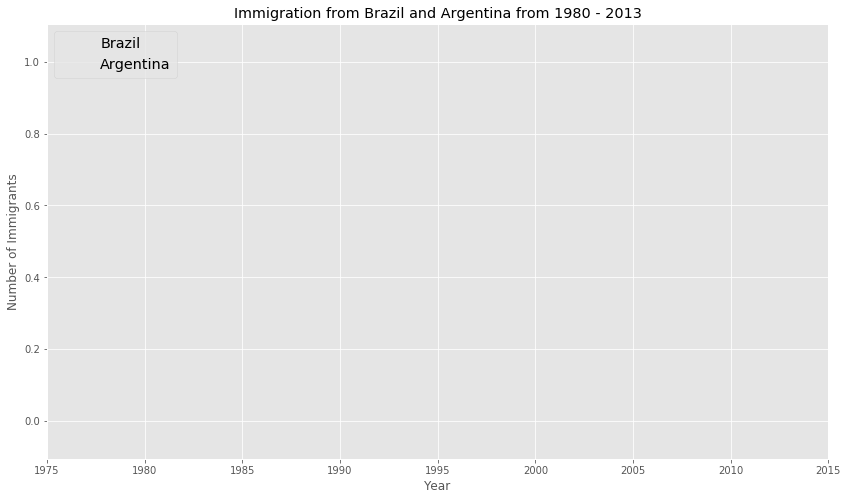

In [44]:
#Plot the data
#BR
ax0 = df_can_t.plot(kind='scatter',
                   x='Year',
                    y='Brazil',
                   figsize=(14, 8),
                   alpha=0.5,
                   color='green',
                   s=norm_brazil * 2000 + 10,
                   xlim=(1975, 2015))

#Argentina
ax1= df_can_t.plot(kind='scatter',
                   x='Year',
                    y='Argentina',
                   alpha=0.5,
                   color='blue',
                   s=norm_argentina * 2000 + 10,
                   ax = ax0)

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

